<a href="https://colab.research.google.com/github/ivan1003hsu/python_work/blob/master/for_CP/HW_functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

T-shirt/top


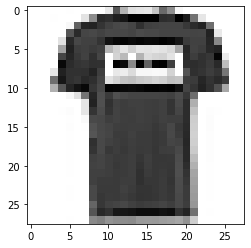

In [3]:
n=1
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [0]:
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)
y_test_ = to_categorical(y_test)
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [0]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, ReLU, Dense, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [0]:
def resnet_CNN2(a,f_n=16,f_size=(2,2),activation='linear'):
    a1 = Conv2D(f_n ,f_size, activation=activation, padding='same')(a)
    a1 = BatchNormalization()(a1)
    a1 = ReLU()(a1)
    a1 = Conv2D(f_n ,f_size, activation=activation, padding='same')(a1)
    a1 = BatchNormalization()(a1)
    a1 = ReLU()(a1)
    a = Add()([a,a1])
    return a

In [0]:
inputx = Input(shape=(28,28,1,))
x = Conv2D(16,(2,2), padding='same')(inputx)
x = resnet_CNN2(x)
x = MaxPooling2D(2,2)(x)
x = resnet_CNN2(x)
x = MaxPooling2D(2,2)(x)
x = resnet_CNN2(x)
x = MaxPooling2D(2,2)(x)
x = resnet_CNN2(x)
x = MaxPooling2D(2,2)(x)
x = resnet_CNN2(x)
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dense(10,activation='softmax')(x)
model = Model(inputs=[inputx], outputs=x)

In [8]:
model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 16)   1040        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d_1[0][0]                   
______________________________________________________________________________________________

In [9]:
mycallback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

history = model.fit(x_train, y_train_, batch_size=512, epochs=10,validation_data=(x_test, y_test_))


Epoch 1/10
118/118 [==============================] - 95s 802ms/step - loss: 0.0528 - accuracy: 0.5989 - val_loss: 0.0929 - val_accuracy: 0.1782
Epoch 2/10
118/118 [==============================] - 94s 798ms/step - loss: 0.0261 - accuracy: 0.8149 - val_loss: 0.0910 - val_accuracy: 0.2136
Epoch 3/10
118/118 [==============================] - 94s 797ms/step - loss: 0.0216 - accuracy: 0.8475 - val_loss: 0.0638 - val_accuracy: 0.5114
Epoch 4/10
118/118 [==============================] - 94s 800ms/step - loss: 0.0191 - accuracy: 0.8659 - val_loss: 0.0400 - val_accuracy: 0.7104
Epoch 5/10
118/118 [==============================] - 94s 799ms/step - loss: 0.0178 - accuracy: 0.8757 - val_loss: 0.0375 - val_accuracy: 0.7261
Epoch 6/10
118/118 [==============================] - 94s 794ms/step - loss: 0.0170 - accuracy: 0.8819 - val_loss: 0.0223 - val_accuracy: 0.8420
Epoch 7/10
118/118 [==============================] - 95s 802ms/step - loss: 0.0161 - accuracy: 0.8896 - val_loss: 0.0189 - val_ac

KeyboardInterrupt: ignored

這邊看起來是overfitting了，於是就手動停止

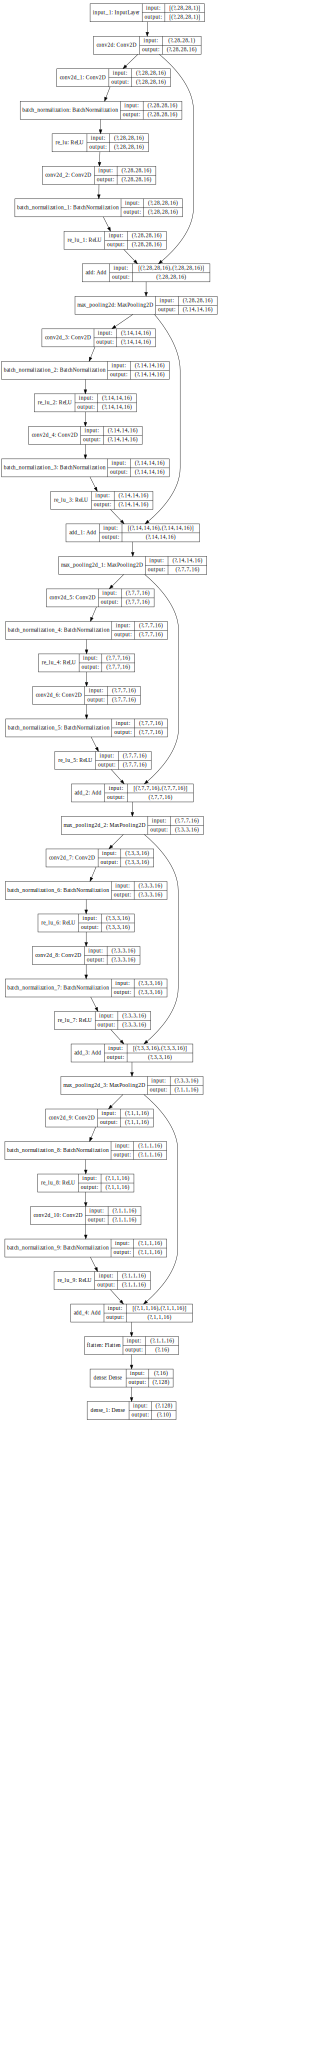

In [10]:
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
plot_model(model,show_shapes=True, to_file='HW_functional_API.png')
SVG(model_to_dot(model,show_shapes=True, dpi=50).create(prog='dot', format='svg'))